<a href="https://colab.research.google.com/github/willwang171/march_madness_sentiment/blob/main/Final_Project_Main_Code_Models_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

### Data

In [ ]:
import random

# Dictionary of team names with their variations
team_keywords = {
        'Alabama': ['alabama', 'crimson tide', 'bama', 'ua'],
        'Houston': ['houston', 'cougars', 'uh'],
        'Kansas': ['kansas', 'jayhawks', 'ku'],
        'Purdue': ['purdue', 'boilermakers'],
        'UCLA': ['ucla', 'bruins'],
        'University of Texas': ['longhorns', 'ut'],
        'Arizona': ['arizona', 'wildcats', 'u of a'],
        'Marquette': ['marquette', 'golden eagles'],
        'Baylor': ['baylor', 'bears'],
        'Gonzaga': ['gonzaga', 'bulldogs', 'zags'],
        'Kansas St.': ['kansas state', 'wildcats', 'ksu'],
        'Xavier': ['xavier', 'musketeers'],
        'UConn': ['uconn', 'huskies', 'connecticut'],
        'Tennessee': ['tennessee', 'volunteers', 'vols'],
        'Indiana': ['indiana', 'hoosiers'],
        'Virginia': ['virginia', 'cavaliers', 'uva'],
        'San Diego St.': ['san diego state', 'aztecs', 'sdsu', 'san diego'],
        'Duke': ['duke', 'blue devils'],
        'Saint Mary’s (CA)': ['saint mary\'s', 'gaels', 'smc'],
        'Miami (FL)': ['miami', 'hurricanes', 'the u', 'um'],
        'Iowa St.': ['iowa state', 'cyclones', 'isu'],
        'Creighton': ['creighton', 'bluejays'],
        'Kentucky': ['kentucky', 'wildcats', 'uk'],
        'TCU': ['tcu', 'horned frogs', 'texas christian'],
        'Texas A&M': ['texas a&m', 'aggies'],
        'Michigan St.': ['michigan state', 'spartans', 'msu'],
        'Missouri': ['missouri', 'tigers', 'mizzou'],
        'Northwestern': ['northwestern', 'wildcats', 'nu'],
        'Memphis': ['memphis', 'tigers'],
        'Arkansas': ['arkansas', 'razorbacks', 'hogs'],
        'Maryland': ['maryland', 'terrapins', 'terps'],
        'Iowa': ['iowa', 'hawkeyes'],
        'Florida Atlantic': ['florida atlantic', 'owls', 'fau'],
        'West Virginia': ['west virginia', 'mountaineers', 'wvu'],
        'Auburn': ['auburn', 'tigers'],
        'Illinois': ['illinois', 'fighting illini'],
        'Boise State': ['boise state', 'broncos'],
        'Penn State': ['penn state', 'nittany lions', 'psu'],
        'USC': ['southern california', 'trojans', 'usc'],
        'Utah State': ['utah state', 'aggies'],
        'NC State': ['nc state', 'wolfpack'],
        'Providence': ['providence', 'friars'],
        'Mississippi State': ['mississippi state', 'bulldogs', 'msu'],
        'Pittsburgh': ['pittsburgh', 'panthers', 'pitt'],
        'Arizona State': ['arizona state', 'sun devils', 'asu'],
        'Nevada': ['nevada', 'wolf pack'],
        'College of Charleston': ['college of charleston', 'cougars'],
        'Oral Roberts': ['oral roberts', 'golden eagles'],
        'Drake': ['drake', 'bulldogs'],
        'VCU': ['vcu', 'rams', 'virginia commonwealth'],
        'Kent State': ['kent state', 'golden flashes'],
        'Iowa': ['iowa', 'eagles'],
        'Furman': ['furman', 'paladins'],
        'Louisiana': ['louisiana', 'ragin' 'cajuns', 'ul lafayette'],
        'Kennesaw State': ['kennesaw state', 'owls'],
        'UC Santa Barbara': ['uc santa barbara', 'gauchos', 'ucsb'],
        'Grand Canyon': ['grand canyon', 'antelopes', 'gcu'],
        'Montana State': ['montana state', 'bobcats'],
        'Vermont': ['vermont', 'catamounts'],
        'Colgate': ['colgate', 'raiders'],
        'Princeton': ['princeton', 'tigers'],
        'UNC Asheville': ['unc asheville', 'bulldogs'],
        'Northern Kentucky': ['northern kentucky', 'norse', 'nkU'],
        'Howard': ['howard', 'bison'],
        'A&M-Corpus Christi': ['texas a&m-corpus christi', 'islanders', 'a&m'],
        'Texas Southern': ['texas southern', 'tigers', 'tsu'],
        'Southeast Missouri State': ['southeast missouri state', 'redhawks', 'semo'],
        'Fairleigh Dickinson': ['fairleigh dickinson', 'knights', 'fdu']

    }

In [ ]:
df = pd.read_csv("Cleaned_FINAL.csv")

#### Generate Textual Dataset from Structued Dataset

In [ ]:
import pandas as pd
chunk_size = 200000
# Load the datasets
teams = pd.read_csv('/content/MTeams.csv', usecols=['TeamID', 'TeamName'])
compact_results = pd.read_csv('/content/MNCAATourneyCompactResults.csv')
detailed_results = pd.read_csv('/content/MNCAATourneyDetailedResults.csv', chunksize=chunk_size, usecols=['Season', 'WTeamID', 'LTeamID'])
rankings = pd.read_csv('/content/MMasseyOrdinals_thru_Season2023_Day128.csv', usecols=['Season', 'TeamID', 'OrdinalRank', 'RankingDayNum'])

# Merge the team names into the results dataframes
compact_results = compact_results.merge(teams, left_on='WTeamID', right_on='TeamID', how='left')
compact_results.rename(columns={'TeamName': 'WTeamName'}, inplace=True)
compact_results = compact_results.merge(teams, left_on='LTeamID', right_on='TeamID', how='left')
compact_results.rename(columns={'TeamName': 'LTeamName'}, inplace=True)

# Generate textual descriptions from structured data
def create_description(row):
    return f"On {row['DayNum']}, {row['WTeamName']} defeated {row['LTeamName']} with a score of {row['WScore']}-{row['LScore']}."

descriptions = compact_results.apply(create_description, axis=1)

# Save or print the output
print(descriptions.head())

# Optionally, save to a file
descriptions.to_csv('/content/game_descriptions.csv', index=False)

### Generate Narrative Sentence for Historical Score Dataset(For Training BERT)

In [ ]:
import pandas as pd
import gc

def reduce_memory(df):
    for c in df.columns:
        if df[c].dtype == 'float64':
            df[c] = pd.to_numeric(df[c], downcast='float')
        elif df[c].dtype == 'int64':
            df[c] = pd.to_numeric(df[c], downcast='integer')
    return df

max_ranking_day_num = rankings['RankingDayNum'].max()
rankings_latest = rankings[rankings.RankingDayNum == max_ranking_day_num]
rankings_latest = reduce_memory(rankings_latest)
del rankings
gc.collect()

final_results = pd.DataFrame()

for detailed_results in detailed_results:
    detailed_results = reduce_memory(detailed_results)

    # Merge team names
    detailed_results = detailed_results.merge(teams, left_on='WTeamID', right_on='TeamID', how='left')
    detailed_results.rename(columns={'TeamName': 'WTeamName'}, inplace=True)
    detailed_results = detailed_results.merge(teams, left_on='LTeamID', right_on='TeamID', how='left', suffixes=('', '_L'))
    detailed_results.rename(columns={'TeamName': 'LTeamName'}, inplace=True)

    # Incorporate the latest rankings
    detailed_results = detailed_results.merge(rankings_latest, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
    detailed_results.rename(columns={'OrdinalRank': 'WTeamRank'}, inplace=True)
    detailed_results = detailed_results.merge(rankings_latest, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=('', '_L'))
    detailed_results.rename(columns={'OrdinalRank': 'LTeamRank'}, inplace=True)

    # Create ranking descriptions
    detailed_results['RankingDescription'] = (
        "In the latest rankings for the season " + detailed_results['Season'].astype(str) +
        ", " + detailed_results['WTeamName'] + " is ranked " + detailed_results['WTeamRank'].astype(str) +
        " while " + detailed_results['LTeamName'] + " is ranked " + detailed_results['LTeamRank'].astype(str) + "."
    )

    # Append to final results
    final_results = pd.concat([final_results, detailed_results], ignore_index=True)

    del detailed_results
    gc.collect()

final_results.to_csv('/content/historical_ranking_data.csv', index=False)


<ipython-input-25-c6c4f31aec0f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = pd.to_numeric(df[c], downcast='integer')


### Preprocessing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and load stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):  # Check if the input is a string
        return ""  # Return empty string if not

    try:
        # Convert to lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove special characters and numbers
        text = re.sub(r'\W+|\d+', ' ', text)
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatization
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Joining tokens to form string again
        return ' '.join(tokens)
    except Exception as e:
        print("Error cleaning text: ", e)
        return ""

# Check for NaN values
df['Comment'] = df['Comment'].fillna('')

# Apply the clean_text function to the 'Comment' column
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Unnamed: 0,Comment,Author,Created UTC,Cleaned_Comment,Team
0,0,"**Charity Event**\n\nIf your team won, you don...",rCBBMod,2023-04-02 00:36:57,charity event team donate local food bank team...,Florida Atlantic
1,1,SDSU Coach “I ran out of plays so I didn’t cal...,20mcfadenr,2023-04-02 00:33:44,sdsu coach ran play call timeout lmfao,san diego st.
2,2,Box out and find the ball on your free throws ...,[deleted],2023-04-02 00:33:19,box find ball free throw kid,none
3,3,I love buzzer beaters so much when I'm neutral...,dont_ask_my_cab,2023-04-02 00:33:25,love buzzer beater much neutral scared non bas...,none
4,4,The legacy of the legendary and weird 2023 NCA...,Astroboyy7,2023-04-02 00:33:17,legacy legendary weird ncaa tournament continues,none


### 1. GPT team assignment


In [ ]:
import requests

def query_openai(prompt):
    api_key = #Hidden
    headers = {
        'Authorization': f'Bearer {api_key}',
        'Content-Type': 'application/json',
    }

    data = {
        'model': 'gpt-3.5-turbo',
        'messages': [
            {"role": "user", "content": prompt}
        ],
        'max_tokens': 100
    }

    response = requests.post('https://api.openai.com/v1/chat/completions', headers=headers, json=data)
    return response.json()

In [ ]:
df

,Comment,Author,Created UTC,Cleaned_Comment
0,"**Charity Event**\n\nIf your team won, you don...",rCBBMod,2023-04-02 00:36:57,charity event team donate local food bank team...
1,SDSU Coach “I ran out of plays so I didn’t cal...,20mcfadenr,2023-04-02 00:33:44,sdsu coach ran play call timeout lmfao
2,Box out and find the ball on your free throws ...,[deleted],2023-04-02 00:33:19,box find ball free throw kid
3,I love buzzer beaters so much when I'm neutral...,dont_ask_my_cab,2023-04-02 00:33:25,love buzzer beater much neutral scared non bas...
4,The legacy of the legendary and weird 2023 NCA...,Astroboyy7,2023-04-02 00:33:17,legacy legendary weird ncaa tournament continues
...,...,...,...,...
1189,Okay you’re just dumb and not reading apparent...,Sufficient_Memory_24,2023-04-02 01:16:35,okay dumb reading apparently loser mentality n...
1190,"As a wise man once said:\nGloom, despair, and ...",KMorris1987,2023-04-02 01:54:43,wise man said gloom despair agony
1191,> i also think the B1G is about to reverse cou...,[deleted],2023-04-02 00:49:40,also think b g reverse course rutgers national...
1192,I could only imagine how anyone else ended up ...,Alexlsonflre,2023-04-02 05:23:04,could imagine anyone else ended team born vfl ...


In [ ]:
def get_response(query):
  q = f"""The following is a social media comment under a Reddit thread about a March Madness game. Return just the name of the SCHOOL, no mascot, that the comment is about. If there is NO WAY you can figure out what team then return "None":
  {query}
  """
  response = query_openai(q)
  response_message = response['choices'][0]['message']['content']
  return response_message

In [ ]:
df["Team"].value_counts()

In [ ]:
variation_to_team = {variation: team for team, variations in team_keywords.items() for variation in variations}

# Function to normalize team names
def normalize_team_name(team_name):
    team_name = team_name.lower()
    return variation_to_team.get(team_name, team_name)

# Apply the normalization function to the 'Team' column
df['Team'] = df['Team'].apply(normalize_team_name)

print(df['Team'].value_counts())
print(df)

In [ ]:
df = pd.read_csv("/content/Cleaned_FINAL.csv")

In [ ]:
df["Team"].value_counts()

Team
none                   788
san diego st.          136
Florida Atlantic       124
UConn                   18
butler                   8
                      ... 
miami fl                 1
may                      1
petco park               1
pac                      1
Fairleigh Dickinson      1
Name: count, Length: 80, dtype: int64

### 3. BERT

3-1. Further Pre-Training (Domain Adaptation)

In [ ]:
pip uninstall -y transformers

Found existing installation: transformers 4.40.1
Uninstalling transformers-4.40.1:
  Successfully uninstalled transformers-4.40.1


In [ ]:
pip uninstall -y accelerate

In [ ]:
pip cache purge

Files removed: 37


In [ ]:
pip install transformers[torch]==4.18.0 accelerate==0.6.1


In [ ]:
import transformers
import accelerate
print(transformers.__version__)
print(accelerate.__version__)
from transformers import TrainingArguments

4.18.0
0.6.1


In [ ]:
pip install datasets

  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install ray[tune] matplotlib


In [ ]:
pip install ray.tune.integration.transformers

In [ ]:
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
import torch
from transformers import BertTokenizer, BertForMaskedLM, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

from transformers import TrainerCallback
from ray import tune

class TuneReportCallback(TrainerCallback):
    """Custom callback for reporting metrics to Ray Tune."""

    def on_log(self, args, state, control, logs=None, **kwargs):
        if state.is_local_process_zero:
            tune.report(loss=logs.get("loss"), accuracy=logs.get("eval_accuracy"))

def train_model(config):
    from transformers import TrainingArguments, Trainer

    training_args = TrainingArguments(
        output_dir="./bert_pretrain_mlm",
        overwrite_output_dir=True,
        num_train_epochs=10,
        per_device_train_batch_size=int(config["batch_size"]),
        learning_rate=config["lr"],
        save_steps=10000,
        save_total_limit=2,
        report_to="none"
    )

    model = BertForMaskedLM.from_pretrained('bert-base-uncased')
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)

    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=tokenized_datasets,
        callbacks=[TuneReportCallback()]
    )

    trainer.train()
config = {
    "lr": tune.grid_search([5e-5, 3e-5, 2e-5]),
    "batch_size": tune.grid_search([8, 16, 32])
}

scheduler = ASHAScheduler(
    grace_period=1,
    reduction_factor=2
)

ray.init(log_to_driver=False)
analysis = tune.run(
    train_model,
    resources_per_trial={"cpu": 2, "gpu": 1},
    config=config,
    num_samples=1,
    scheduler=scheduler,
    progress_reporter=tune.CLIReporter()
)

ray.shutdown()

# Best hyperparameters
print("Best hyperparameters found were: ", analysis.best_config)



In [ ]:
df = analysis.results_df

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for label, df_group in df.groupby('config.lr'):
    df_group.plot(x='training_iteration', y='loss', ax=ax, label=f"LR: {label}")
ax.set_xlabel("Training Iteration")
ax.set_ylabel("Loss")
ax.set_title("Learning Rate vs. Loss")
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), './bert_pretrain_mlm/model_weights.pth')
model_loaded = BertForMaskedLM.from_pretrained('bert-base-uncased')
model_loaded.load_state_dict(torch.load('./bert_pretrain_mlm/model_weights.pth'))
model_loaded.save_pretrained('./bert_pretrain_mlm')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache 

### 3-2. Fine-tuning BERT


In [ ]:
!pip install --upgrade pip
!pip install -U datasets transformers huggingface_hub

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from transformers import AdamW

dataset = load_dataset('yelp_review_full', split='train')

train_test_split = dataset.train_test_split(train_size=60000, test_size=5000)

In [ ]:
!ls ./bert_pretrain_mlm

config.json	   pytorch_model.bin  special_tokens_map.json  vocab.txt
model_weights.pth  runs		      tokenizer_config.json


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = train_test_split.map(tokenize_function, batched=True)
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

model = BertForSequenceClassification.from_pretrained('./bert_pretrain_mlm', num_labels=5)

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./bert_pretrain_mlm and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from transformers import Trainer, TrainingArguments, AdamW, get_scheduler
from transformers.trainer_callback import EarlyStoppingCallback

# Define training arguments
training_args = TrainingArguments(
    output_dir="./bert_finetune_sentiment",
    overwrite_output_dir=True,
    evaluation_strategy="steps",
    eval_steps=1000,
    per_device_train_batch_size=16,
    num_train_epochs=5,
    save_steps=1000,
    load_best_model_at_end=True
)

# Initialize the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

# Define the number of training steps
num_training_steps = (len(tokenized_datasets['train']) // training_args.per_device_train_batch_size) * training_args.num_train_epochs

# Initialize the learning rate scheduler
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

# Initialize the Trainer with both optimizer and scheduler
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    optimizers=(optimizer, lr_scheduler),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 60000
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 18750


Step,Training Loss,Validation Loss
1000,1.024600,0.958515
2000,0.965000,0.949161
3000,0.938500,0.919445
4000,0.844800,0.959051
5000,0.774100,0.939457
6000,0.768100,0.939741
7000,0.767500,0.920879
8000,0.547500,1.042983


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to ./bert_finetune_sentiment/checkpoint-1000
Configuration saved in ./bert_finetune_sentiment/checkpoint-1000/config.json
Model weights saved in ./bert_finetune_sentiment/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to ./bert_finetune_sentiment/checkpoint-2000
Configuration saved in ./bert_finetune_senti

TrainOutput(global_step=8000, training_loss=0.8581290397644042, metrics={'train_runtime': 3278.0794, 'train_samples_per_second': 91.517, 'train_steps_per_second': 5.72, 'total_flos': 8419780558848000.0, 'train_loss': 0.8581290397644042, 'epoch': 2.13})

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import numpy as np

predictions = trainer.predict(tokenized_datasets['test'])

preds = np.argmax(predictions.predictions, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(predictions.label_ids, preds)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(predictions.label_ids, preds, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

label_names = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']

report = classification_report(predictions.label_ids, preds, target_names=label_names)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 5000
  Batch size = 8


Accuracy: 0.601
Precision: 0.5953544728035867
Recall: 0.601
F1 Score: 0.5830569479788342


In [ ]:
import os
model.save_pretrained('./bert_finetuned_model', save_function=torch.save)

print("Files after manual save:", os.listdir('./bert_finetuned_model'))

Files after manual save: ['.ipynb_checkpoints', 'vocab.txt', 'config.json', 'tokenizer_config.json', 'model.safetensors', '.DS_Store', 'special_tokens_map.json', 'pytorch_model.bin']


In [ ]:
from transformers import BertForSequenceClassification

# Attempt to load the model from the directory
try:
    model = BertForSequenceClassification.from_pretrained('./bert_finetuned_model')
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading model:", e)

Model loaded successfully.


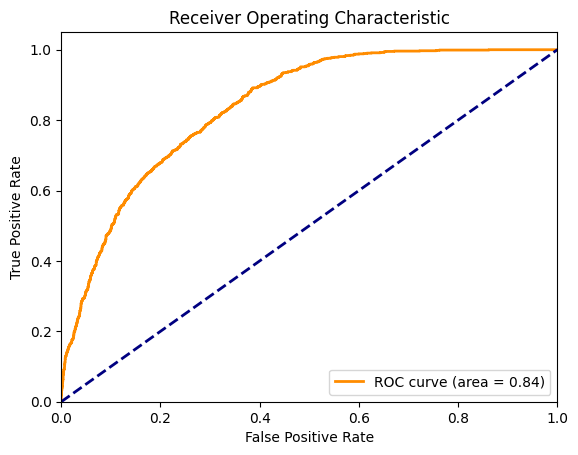

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

probs = predictions.predictions[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(predictions.label_ids, probs, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

model_dir = '/content/bert_finetuned_model'

tokenizer = BertTokenizer.from_pretrained(model_dir)
tokenizer.save_pretrained(model_dir)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained(model_dir)

# Load the fine-tuned
model = BertForSequenceClassification.from_pretrained(model_dir)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

### 3.3 Mean_Pooling (sBERT)

In [ ]:
from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained(model_dir)
model = BertModel.from_pretrained(model_dir)
model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# Assuming the model directory contains the model and tokenizer files
model_dir = "/content/bert_finetuned_model"

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained(model_dir)
model = BertModel.from_pretrained(model_dir)
model.eval()

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.last_hidden_state  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def get_embeddings(texts, tokenizer, model, device='cpu', batch_size=8):
    model.to(device)  # Move model to the appropriate device
    embeddings = []

    # Process texts in batches
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        # Encode the batch of texts
        encoded_inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        encoded_inputs = {k: v.to(device) for k, v in encoded_inputs.items()}  # Move tensors to device

        with torch.no_grad():
            # Get output from the model
            outputs = model(**encoded_inputs)
            # Perform mean pooling
            pooled_embeddings = mean_pooling(outputs, encoded_inputs['attention_mask'])
            embeddings.append(pooled_embeddings.cpu().numpy())  # Move embeddings back to CPU and convert to numpy

    return np.vstack(embeddings)  # Stack embeddings



In [ ]:
# Test embeddings for training dataset
temp_df = tokenized_datasets['test'].to_pandas()
texts = temp_df['text'].tolist()

embeddings = get_embeddings(texts, tokenizer, model, batch_size=8)

print(embeddings)

[[-0.0430983   0.05478001  0.18759899 ...  0.16398807 -0.08162937
   0.07972928]
 [-0.15128665  0.20822954  0.28449848 ...  0.17533366  0.05390863
   0.3002729 ]
 [-0.11259368  0.09827413  0.20685247 ...  0.0496087   0.20166427
   0.10575968]
 ...
 [ 0.12914842  0.16850694  0.2734588  ...  0.09345262  0.0722307
   0.0826283 ]
 [-0.11718275  0.04984271  0.4254377  ...  0.22432016  0.18028022
   0.14316116]
 [ 0.03839508  0.1481538   0.1895983  ...  0.08386231  0.04250954
   0.07921088]]


In [ ]:
temp_df

,label,text,input_ids,token_type_ids,attention_mask
0,3,I haven't been scuba diving in a few years and...,"[101, 1045, 4033, 1005, 1056, 2042, 28651, 940...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,Low quality ingredients.,"[101, 2659, 3737, 12760, 1012, 102, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Went last night for MTL \u00e0 Table and had a...,"[101, 2253, 2197, 2305, 2005, 11047, 2140, 103...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,1,"Before I start, we got there around 4:00 pm af...","[101, 2077, 1045, 2707, 1010, 2057, 2288, 2045...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,3,"Me & my fiance really had a great experience, ...","[101, 2033, 1004, 2026, 19154, 2428, 2018, 103...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...
4995,3,They do a god job in my pedicure just think ne...,"[101, 2027, 2079, 1037, 2643, 3105, 1999, 2026...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4996,1,I REALLY wanted chinese food last night but I ...,"[101, 1045, 2428, 2359, 2822, 2833, 2197, 2305...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4997,1,"I'm not a fan of buffets. So, why did I go her...","[101, 1045, 1005, 1049, 2025, 1037, 5470, 1997...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4998,2,This is a review for the stratosphere restaura...,"[101, 2023, 2003, 1037, 3319, 2005, 1996, 2358...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
import pandas as pd
embeddings_df = pd.DataFrame(embeddings)

# Save to CSV
embeddings_df.to_csv('/content/embeddings.csv', index=False)

### 3.4 Model Deployment

In [ ]:
# Deploying Model
actual_comment_df = df['Cleaned_Comment'].tolist()
all_comments_as_strings = [str(comment) for comment in actual_comment_df]

# Tokenize comments
tokenized_data = tokenize_comments(all_comments_as_strings, tokenizer)

# Get embeddings
comment_embeddings = get_embeddings(
    input_ids=tokenized_data['input_ids'],
    attention_mask=tokenized_data['attention_mask'],
    model=model,
    device='cpu'
)

print(comment_embeddings)

[[-1.2283839e-01  1.6690789e-02  7.3839438e-01 ...  2.0021458e-01
   4.6562180e-02  3.0412123e-01]
 [ 1.2339074e-01 -2.4986373e-02  4.3236312e-01 ...  1.9045402e-01
  -2.3856263e-01 -1.5387300e-01]
 [ 5.8328532e-02  6.1464675e-02 -4.7621336e-02 ... -1.4593056e-01
  -4.0390816e-01 -3.9151922e-01]
 ...
 [-1.5876792e-01 -7.9961736e-03  5.5682158e-01 ...  6.4557120e-02
   1.0501956e-01  1.9145887e-01]
 [ 1.3265926e-01  1.2723684e-01  6.6187024e-01 ...  2.8434440e-01
   5.5004206e-02 -4.1535310e-03]
 [ 1.5525833e-01  2.4204440e-01  5.0426203e-01 ...  3.9385378e-02
  -1.7939973e-01  1.5706818e-04]]


In [ ]:
embeddings_df.to_csv('/content/actual_comment_embeddings.csv', index=False)

In [ ]:
actual_comment_embeddings = pd.read_csv("actual_comment_embeddings.csv")

### 4. RAG

### 4.1 RAG Initialization

In [ ]:
pip uninstall transformers accelerate -y

In [ ]:
pip install transformers[torch]

In [ ]:
! pip install -U langchain-nomic langchain_community tiktoken langchainhub chromadb langchain langgraph tavily-python gpt4all

In [ ]:
pip install accelerate

In [ ]:
pip install git+https://github.com/huggingface/accelerate

In [ ]:
! git clone https://github.com/huggingface/accelerate

fatal: destination path 'accelerate' already exists and is not an empty directory.


In [ ]:
! cd accelerate

In [ ]:
pip install -e


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

-e option requires 1 argument


In [ ]:
! python -c "from accelerate.utils import write_basic_config; write_basic_config(mixed_precision='fp16')"

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [ ]:
pip install faiss-cpu

In [ ]:
pip install faiss-gpu

In [ ]:
import torch

# Check if CUDA is available and set the default device to GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU instead.")

Using GPU: Tesla T4


### 4.2 RAG Retriever Pre-Training

In [ ]:
import os
import torch
import numpy as np
from transformers import DistilBertTokenizer, DistilBertModel, RagConfig, RagTokenForGeneration, RagRetriever, Trainer, TrainingArguments
import faiss
from torch.utils.data import Dataset

class DocumentStore:
    def __init__(self, document_paths):
        self.documents = []
        for path in document_paths:
            if os.path.exists(path):
                with open(path, 'r', encoding='utf-8') as file:
                    text = file.read()
                self.documents.append({'title': os.path.basename(path), 'text': text})

    def get_doc_text(self, doc_id):
        return self.documents[doc_id]['text']

class CustomRagRetriever(RagRetriever):
    def __init__(self, config, question_encoder_tokenizer, generator_tokenizer, document_store):
        super().__init__(config, question_encoder_tokenizer=question_encoder_tokenizer, generator_tokenizer=generator_tokenizer)
        self.document_store = document_store

    def retrieve(self, question_hidden_states, n_docs):
        question_hidden_states_np = question_hidden_states.numpy()
        D, I = self.index.search(question_hidden_states_np, n_docs)
        docs = []
        for query_indices in I:
            query_docs = [self.document_store.get_doc_text(idx) for idx in query_indices if idx < len(self.document_store.documents)]
            docs.append(query_docs)
        return D, I, docs

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

file_paths = [
    "/content/Sha_2023_Basketball_March.txt",
    "/content/Interview Transcript.txt",
    "/content/Interview Script II.txt",
    "/content/March Madness 2024 picks.txt",
    "/content/Fearnhead-CalculatingStrengthSchedule-2010.txt",
    "/content/College basketball predictions 2022-23 article.txt",
    "/content/Blog.txt"
]
document_store = DocumentStore(document_paths)
document_texts = [doc['text'] for doc in document_store.documents]

inputs = tokenizer(document_texts, return_tensors="pt", max_length=512, padding="max_length", truncation=True)
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)

dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index_id_map = faiss.IndexIDMap(index)
index_id_map.add_with_ids(embeddings.numpy(), np.array(range(len(embeddings))))

config = RagConfig.from_pretrained('facebook/rag-token-base', use_dummy_dataset=True)
retriever = CustomRagRetriever(config, tokenizer, tokenizer, document_store)
retriever.index = index_id_map
rag_model = RagTokenForGeneration.from_pretrained('facebook/rag-token-base', config=config)
rag_model.set_retriever(retriever)

class MyDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

training_args = TrainingArguments(
    output_dir='./rag_training_results',
    num_train_epochs=3,
    per_device_train_batch_size=2,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

labels = torch.tensor(np.random.rand(len(inputs['input_ids']), model.config.num_labels), dtype=torch.float)
train_dataset = MyDataset(inputs['input_ids'], inputs['attention_mask'], labels)

trainer = Trainer(
    model=rag_model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer
)

try:
    trainer.train()
except Exception as e:
    print(f"Error during training: {e}")


In [ ]:
documents = [
    "/content/Sha_2023_Basketball_March.txt",
    "/content/Interview Transcript.txt",
    "/content/Interview Script II.txt",
    "/content/March Madness 2024 picks.txt",
    "/content/Fearnhead-CalculatingStrengthSchedule-2010.txt",
    "/content/College basketball predictions 2022-23 article.txt",
    "/content/Blog.txt"
]

# Initialize Document Store
document_store = DocumentStore(documents)
print("Document Store Initialization:", [doc for doc in document_store.documents])

# Initialize the retriever (assuming the model and tokenizer are set up)
config = RagConfig.from_pretrained('facebook/rag-token-base', use_dummy_dataset=True)
retriever = CustomRagRetriever(config, tokenizer, tokenizer, document_store)

# Test retrieval
test_query = "Example query text"
test_query_embedding = model(**tokenizer(test_query, return_tensors='pt', padding=True, truncation=True).to(model.device))
D, I, docs = retriever.retrieve(test_query_embedding.last_hidden_state.mean(dim=1), n_docs=1)
print("Retrieved Documents:", docs)

In [ ]:
class DocumentStore:
    def __init__(self, document_paths):
        self.documents = []
        for path in document_paths:
            if os.path.exists(path):
                with open(path, 'r', encoding='utf-8') as file:
                    text = file.read()
                title = os.path.basename(path)
                self.documents.append({'title': title, 'text': text})
            else:
                print(f"Warning: File not found {path}")

    def get_doc_text(self, doc_id):
        return self.documents[doc_id]


class CustomRagRetriever(RagRetriever):
        question_hidden_states_np = question_hidden_states.astype('float32')
        # Perform the FAISS search
        D, I = self.index.search(question_hidden_states_np, n_docs)
        docs = []
        for query_indices in I:
            query_docs = []
            for idx in query_indices:
                doc_data = self.document_store.get_doc_text(int(idx))
                query_docs.append({'title': doc_data['title'], 'text': doc_data['text']})
            docs.append(query_docs)
        return D, I, docs


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained(model_dir)
model = DistilBertModel.from_pretrained(model_dir)

documents = [
    "/content/Sha_2023_Basketball_March.txt",
    "/content/Interview Transcript.txt",
    "/content/Interview Script II.txt",
    "/content/March Madness 2024 picks.txt",
    "/content/Fearnhead-CalculatingStrengthSchedule-2010.txt",
    "/content/College basketball predictions 2022-23 article.txt",
    "/content/Blog.txt"
]
document_store = DocumentStore(documents)

# Tokenize documents
inputs = tokenizer(documents, return_tensors="pt", padding=True, truncation=True, max_length=16)
inputs = inputs
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)

# Create a FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index = faiss.IndexIDMap(index)
index.add_with_ids(embeddings, np.array(range(len(embeddings))))

config = RagConfig.from_pretrained("facebook/rag-token-base", use_dummy_dataset=True)
retriever = CustomRagRetriever(config=config, question_encoder_tokenizer=tokenizer, generator_tokenizer=tokenizer, document_store=document_store)
retriever.index = index
rag_model = RagTokenForGeneration.from_pretrained("facebook/rag-token-base", config=config)
rag_model.set_retriever(retriever)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    logging_dir='./logs'
)

In [ ]:
!rm -rf /root/.cache/huggingface/datasets/*
!rm -rf /root/.cache/huggingface/transformers/*

### 4.3 Hyperparameter Tuning

In [ ]:
import optuna
from transformers import Trainer, TrainingArguments

def model_init():
    return RagTokenForGeneration.from_pretrained("facebook/rag-token-base", config=config)

def objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-4, log=True)
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 5)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16])

    # Initialize the Trainer with the hyperparameter values
    training_args = TrainingArguments(
        output_dir="./results",
        learning_rate=learning_rate,
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=per_device_train_batch_size,
        weight_decay=0.01,
        logging_dir='./logs',
        report_to="none"
    )

    trainer = Trainer(
        model_init=model_init,  # model initialization
        args=training_args,
        train_dataset=train_dataset,
        tokenizer=tokenizer
    )

    # Run
    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result["eval_loss"]

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)


### 4.4 RAG Deployment

Demo Deployed in "Gradient AI":
Refer to Github --Readme "Model Demo"

